In [1]:
# Author: Ben Brock 
# Created on May 03, 2023 


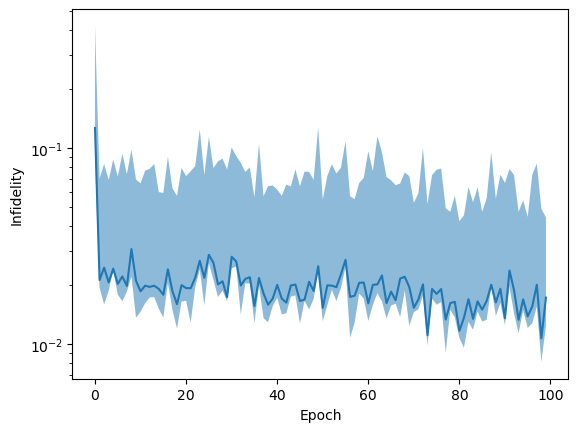

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import os

root_dir = os.getcwd()
filename = root_dir+r'\20240726.h5'
run = '0'

f = h5py.File(filename,'r')

rl_params = {key:item 
             for key,item in f[run]['rl_params'].attrs.items()
             }
action_scale = {key:item 
                for key,item in f[run]['rl_params']['action_scale'].attrs.items()
                }
action_script = {key:item 
                 for key,item in f[run]['rl_params']['action_script'].attrs.items()
                 }
to_learn = {key:item 
            for key,item in f[run]['rl_params']['to_learn'].attrs.items()
            }

training_actions = {key:item[()] 
                    for key,item in f[run]['training']['actions'].items()
                    }
training_rewards = f[run]['training']['rewards'][()]

evaluation_actions = {key:item[()] 
                      for key,item in f[run]['evaluation']['actions'].items()
                      }
evaluation_rewards = f[run]['evaluation']['rewards'][()]

f.close()

# %%

epochs = np.arange(rl_params['num_epochs'])

infidelity = (1-training_rewards)/2.0
mean_infidelity = np.mean(infidelity,axis=1)
stdev_infidelity = np.std(infidelity,axis=1)
min_infidelity = np.amin(infidelity,axis=1)
max_infidelity = np.amax(infidelity,axis=1)
fig,ax = plt.subplots(1,1)
ax.plot(epochs,mean_infidelity)
ax.fill_between(epochs,
                mean_infidelity-min_infidelity,
                mean_infidelity+max_infidelity,
                alpha = 0.5)
ax.set_xlabel('Epoch')
ax.set_ylabel('Infidelity')
ax.set_yscale('log')
plt.show()

# %%

mean_real_pulses = np.mean(training_actions['pulse_array_real'],axis=1)
stdev_real_pulses = np.std(training_actions['pulse_array_real'],axis=1)
min_real_pulses = np.amin(training_actions['pulse_array_real'],axis=1)
max_real_pulses = np.amax(training_actions['pulse_array_real'],axis=1)

mean_imag_pulses = np.mean(training_actions['pulse_array_imag'],axis=1)
stdev_imag_pulses = np.std(training_actions['pulse_array_imag'],axis=1)
min_imag_pulses = np.amin(training_actions['pulse_array_imag'],axis=1)
max_imag_pulses = np.amax(training_actions['pulse_array_imag'],axis=1)


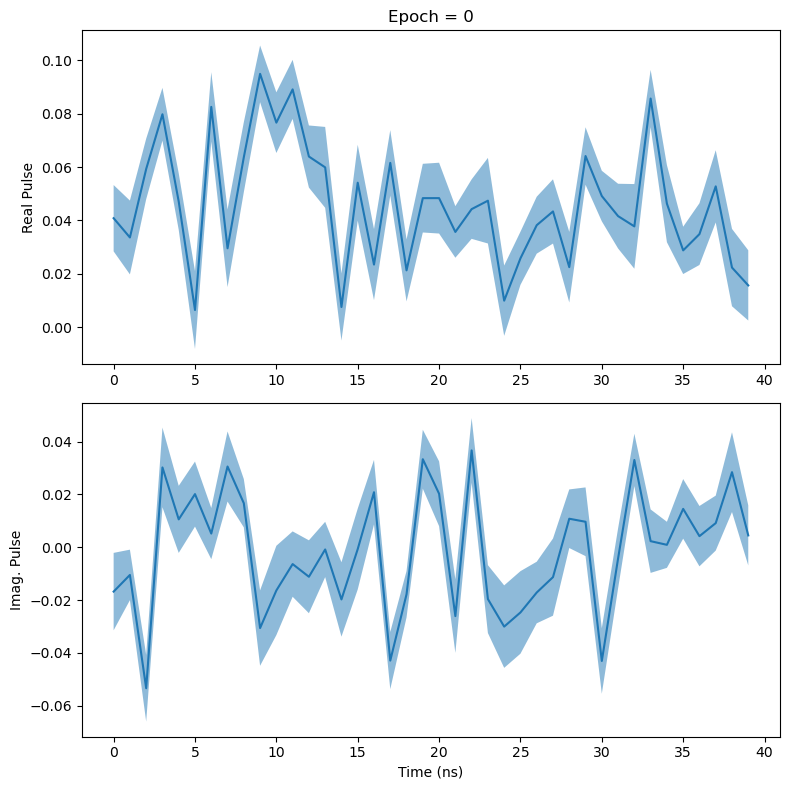

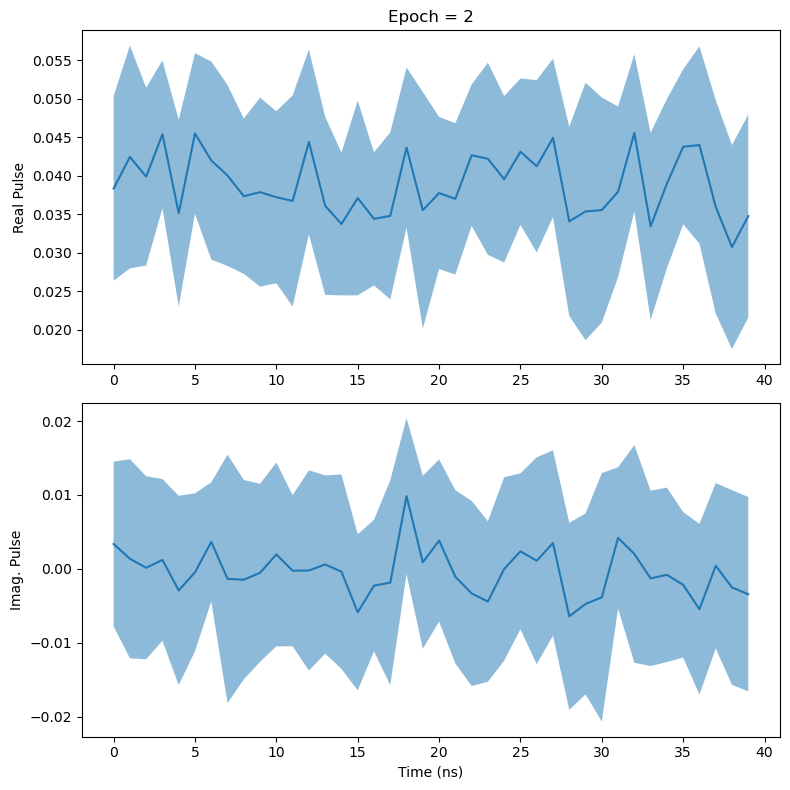

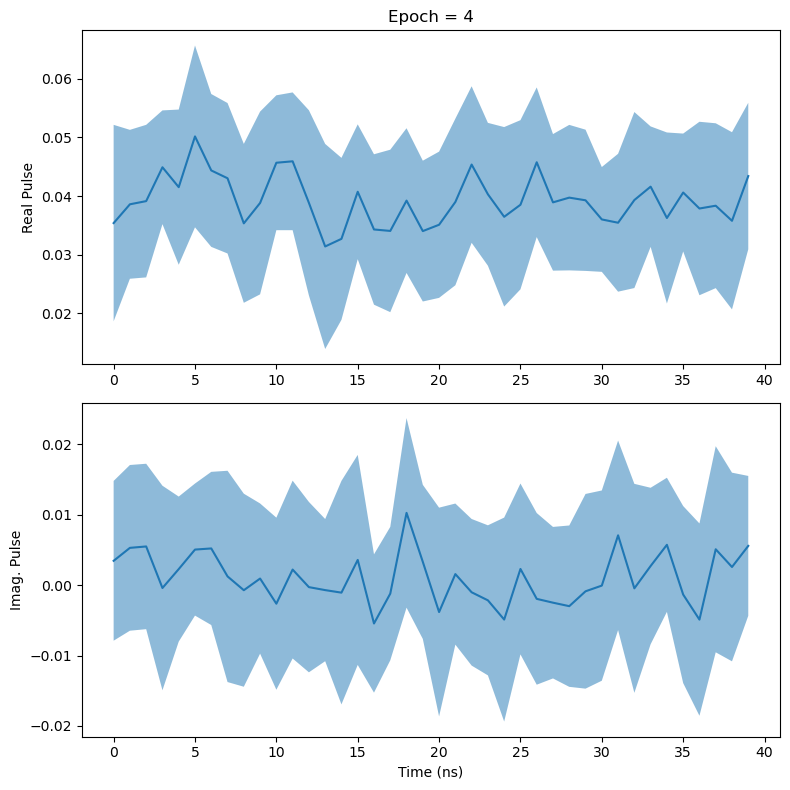

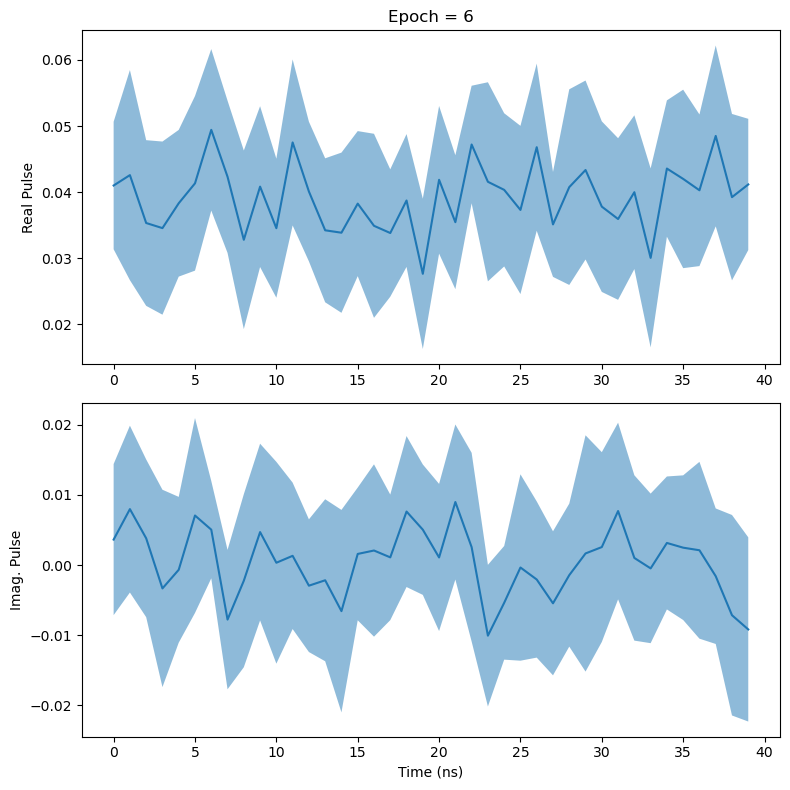

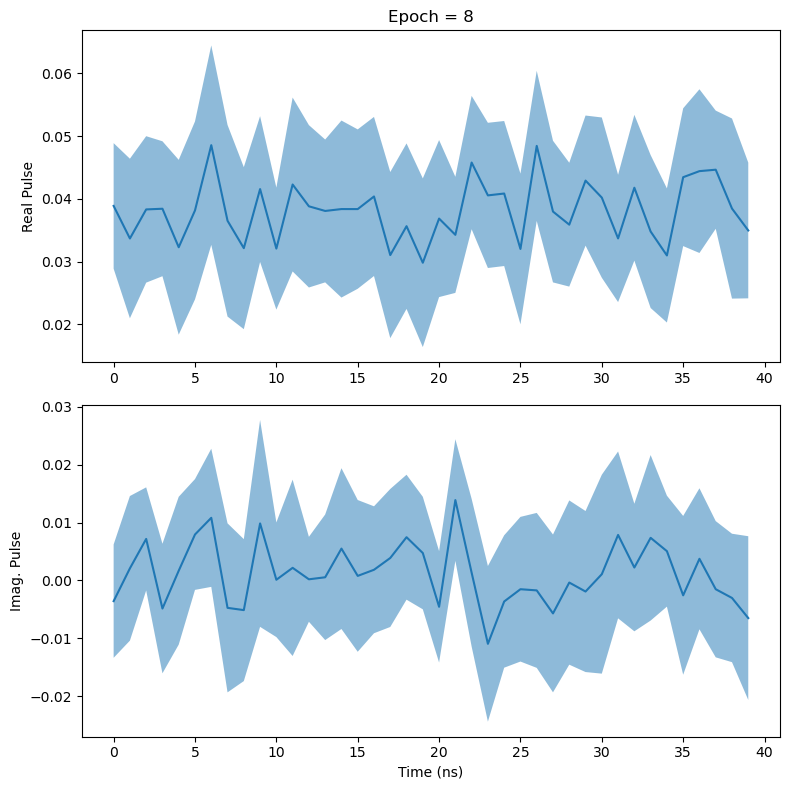

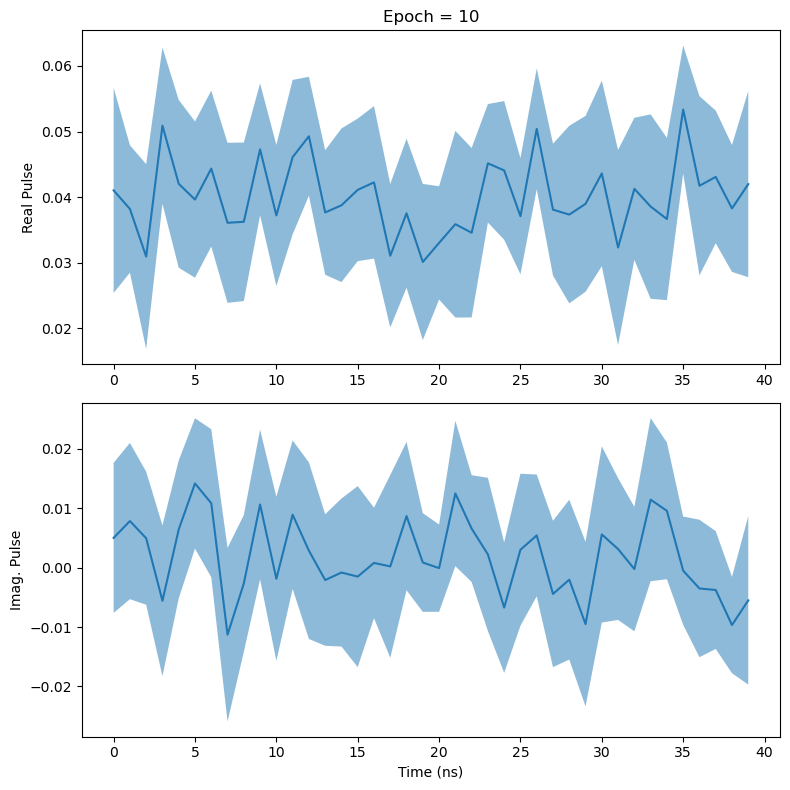

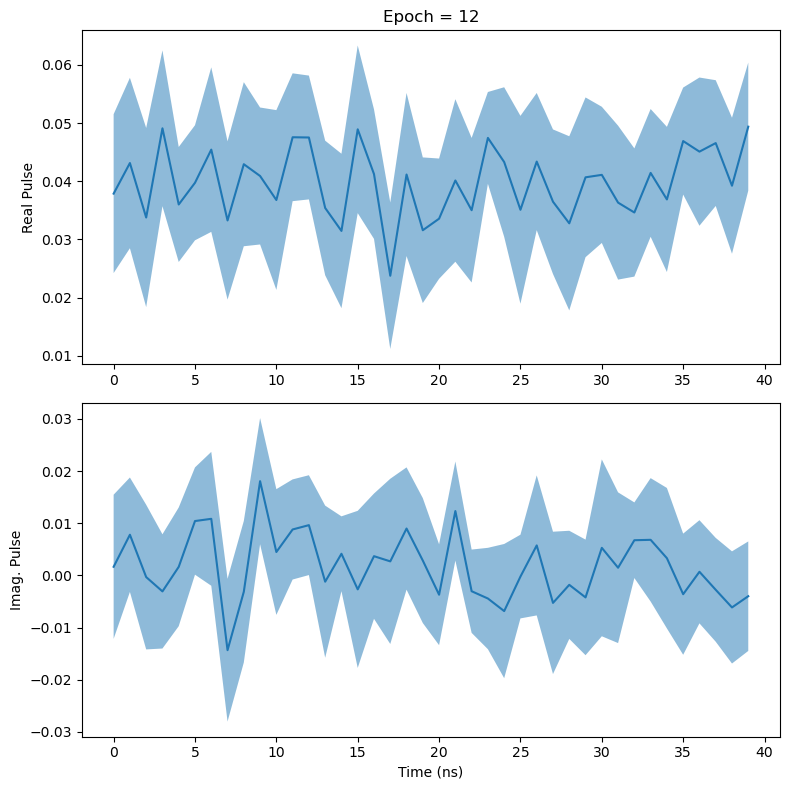

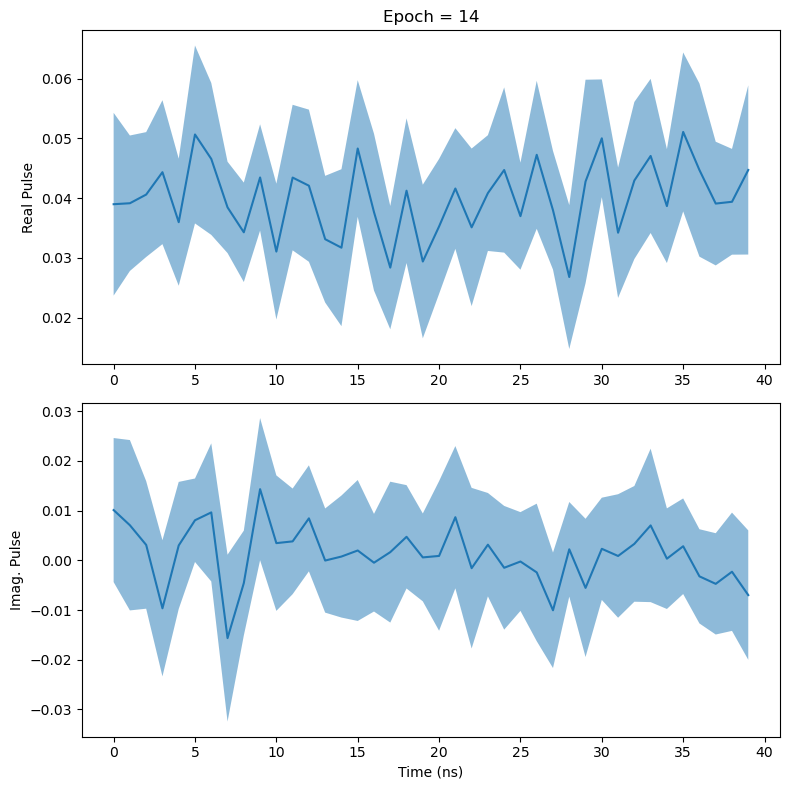

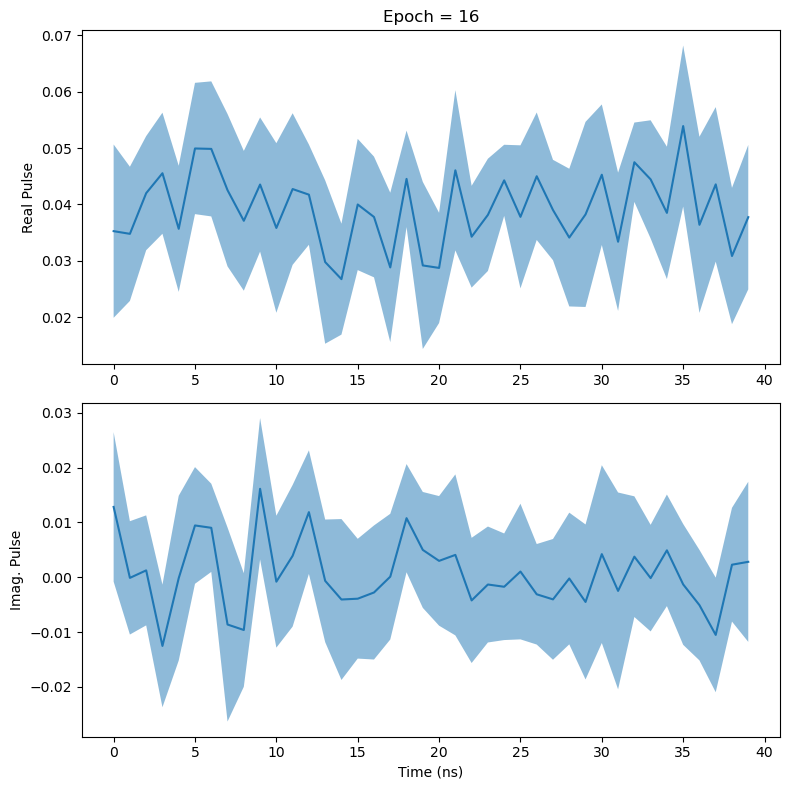

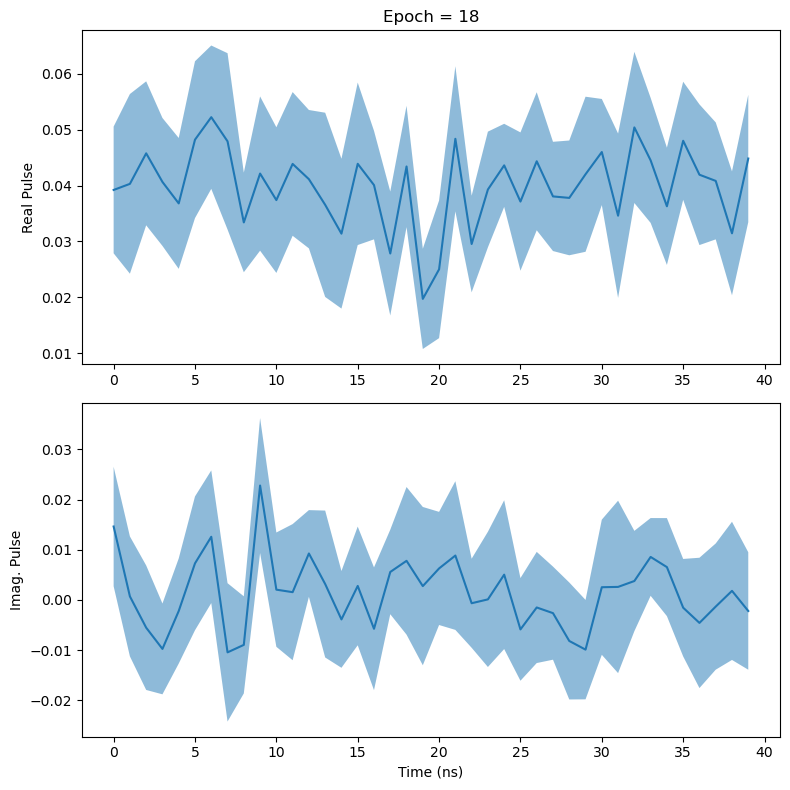

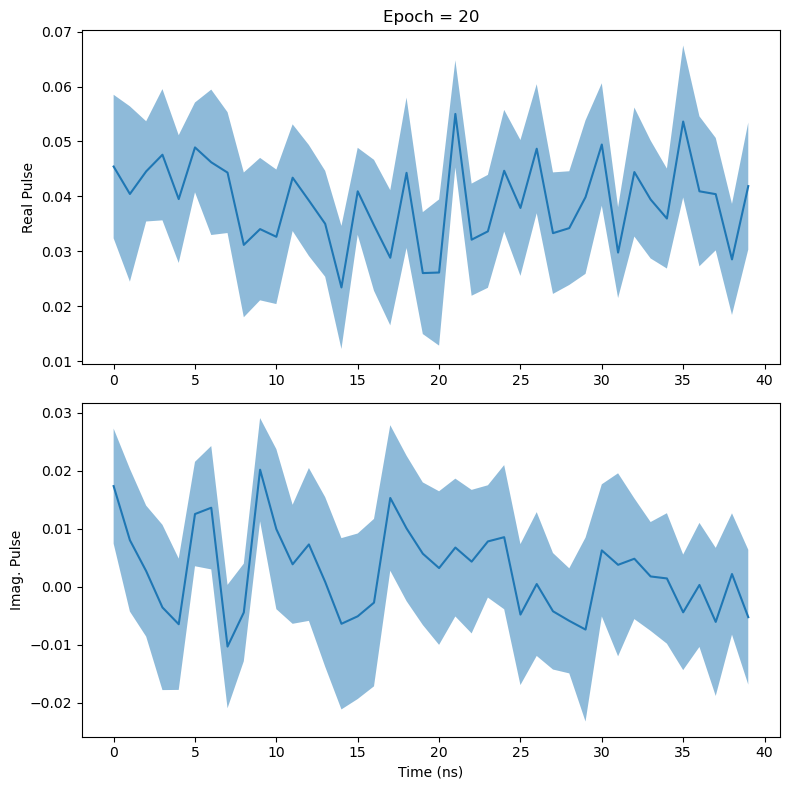

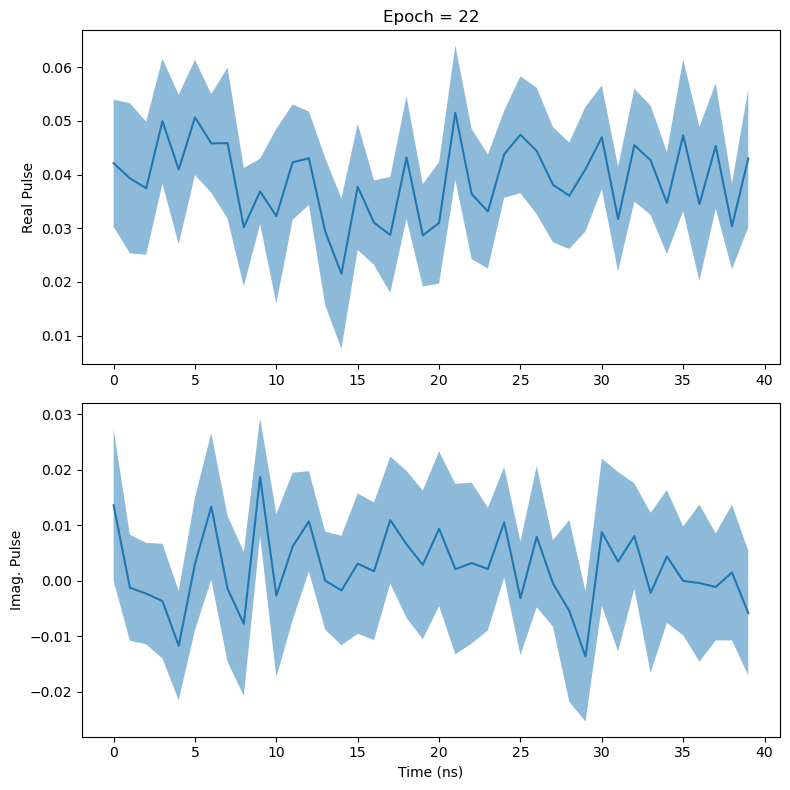

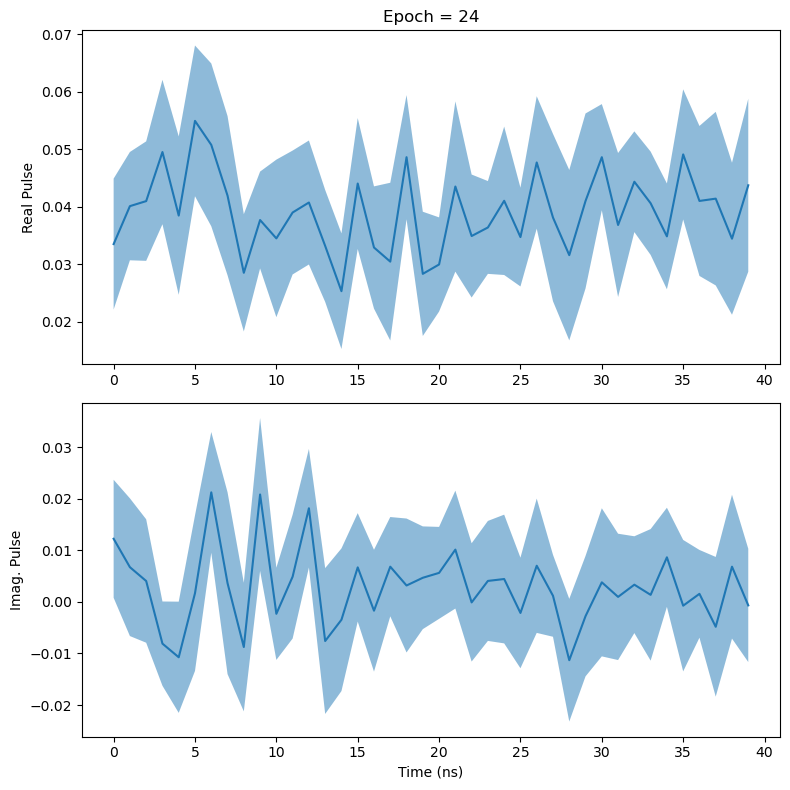

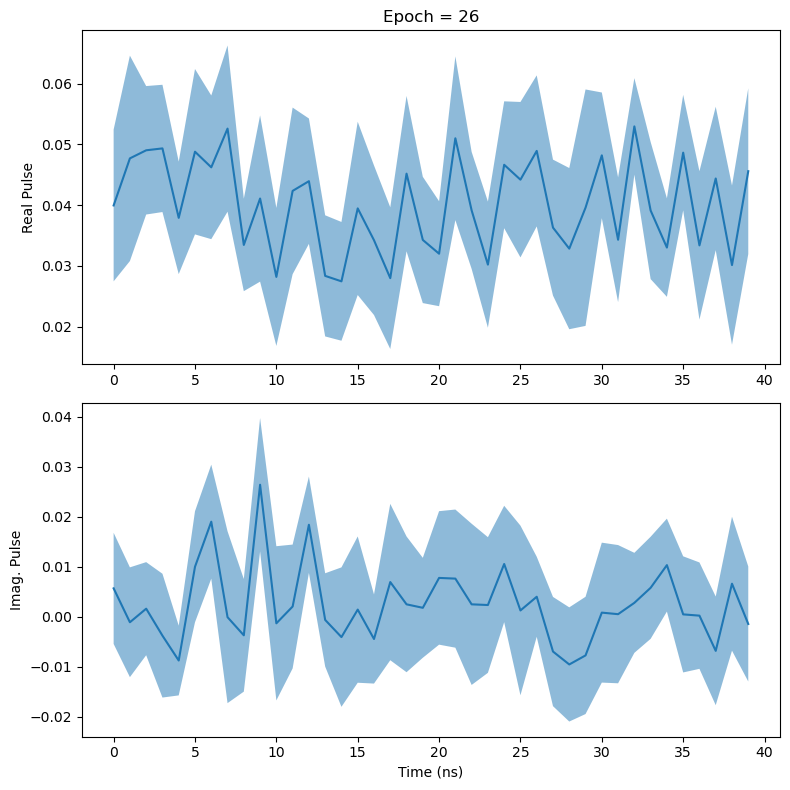

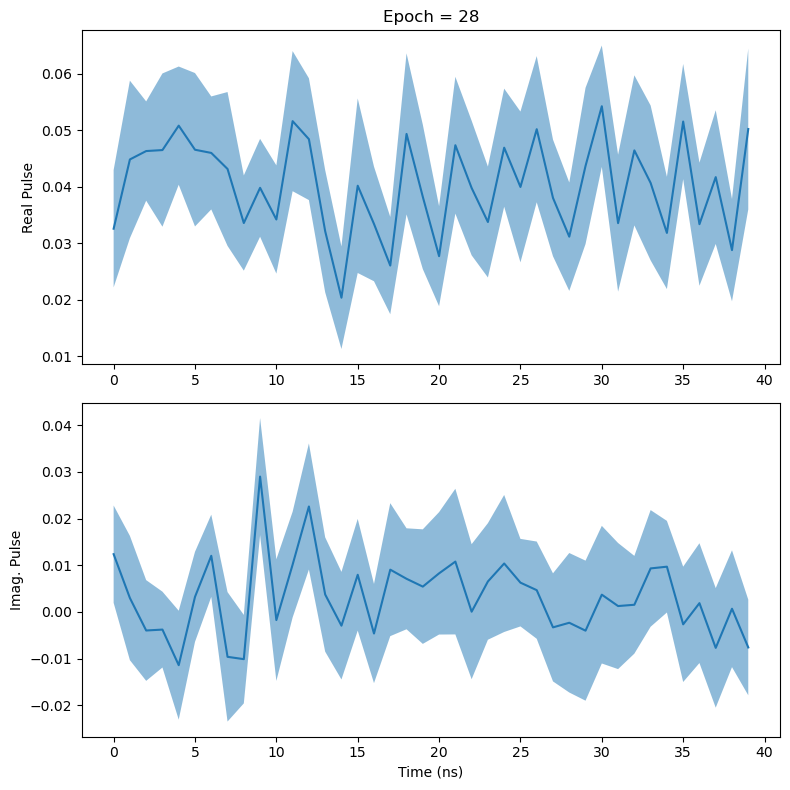

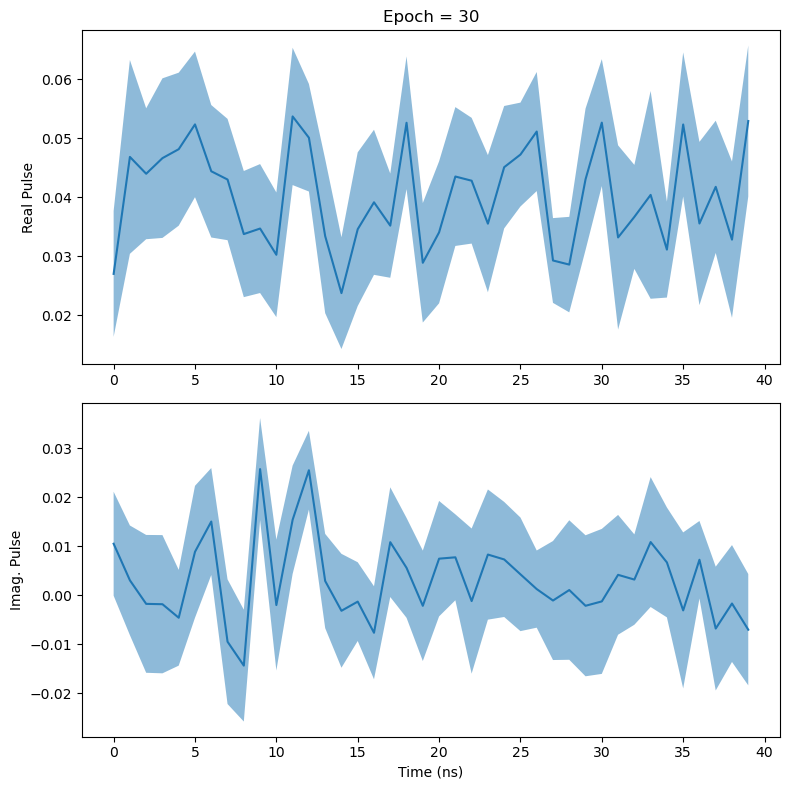

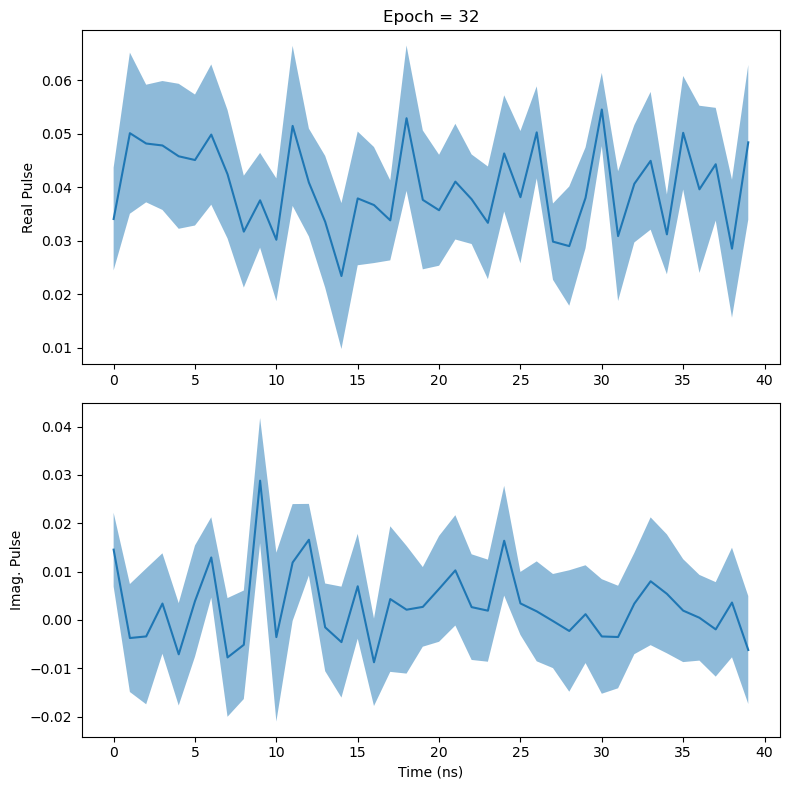

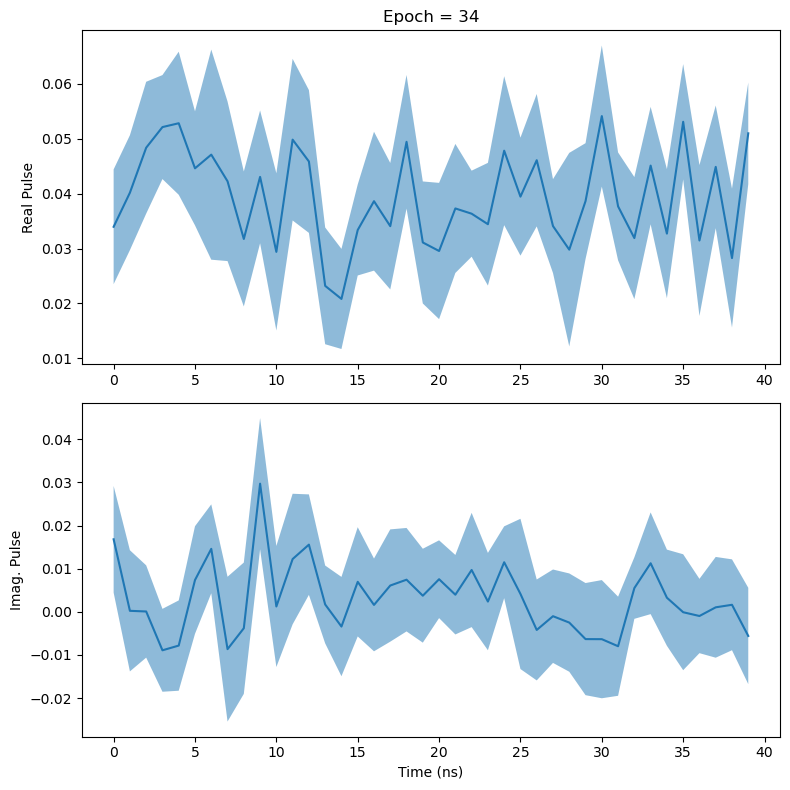

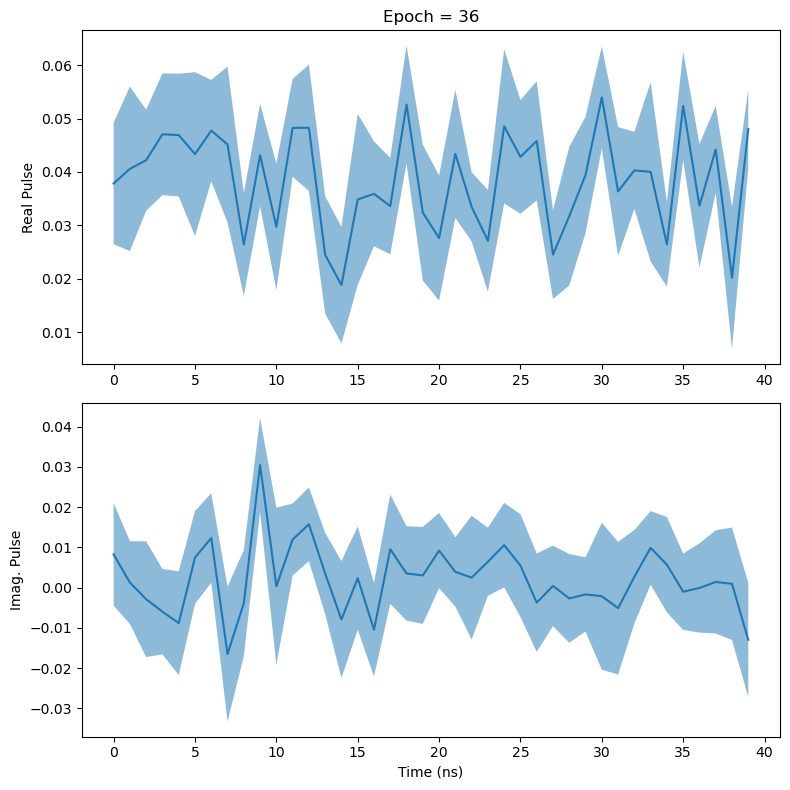

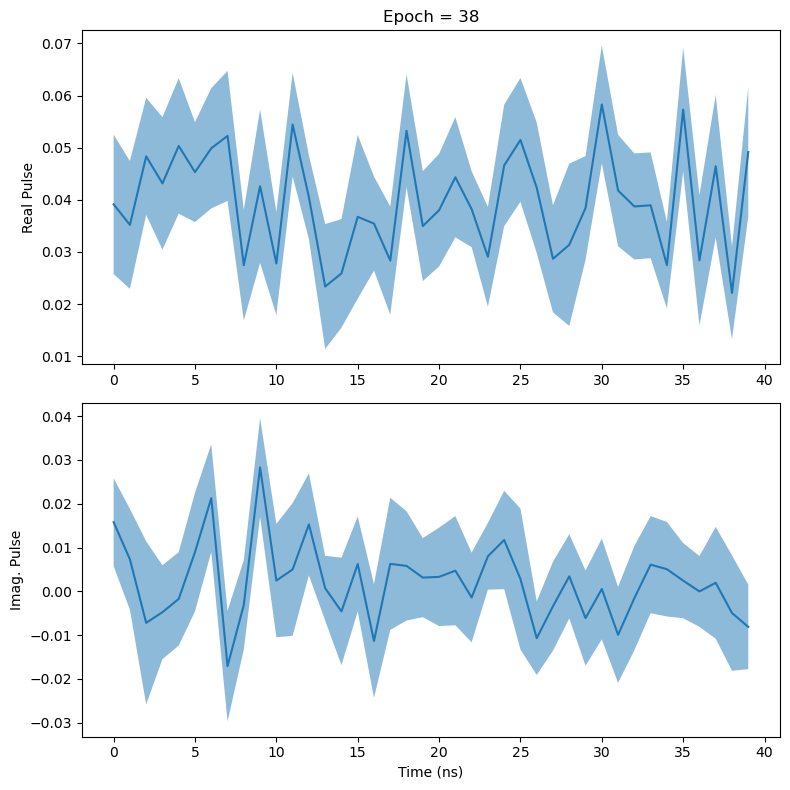

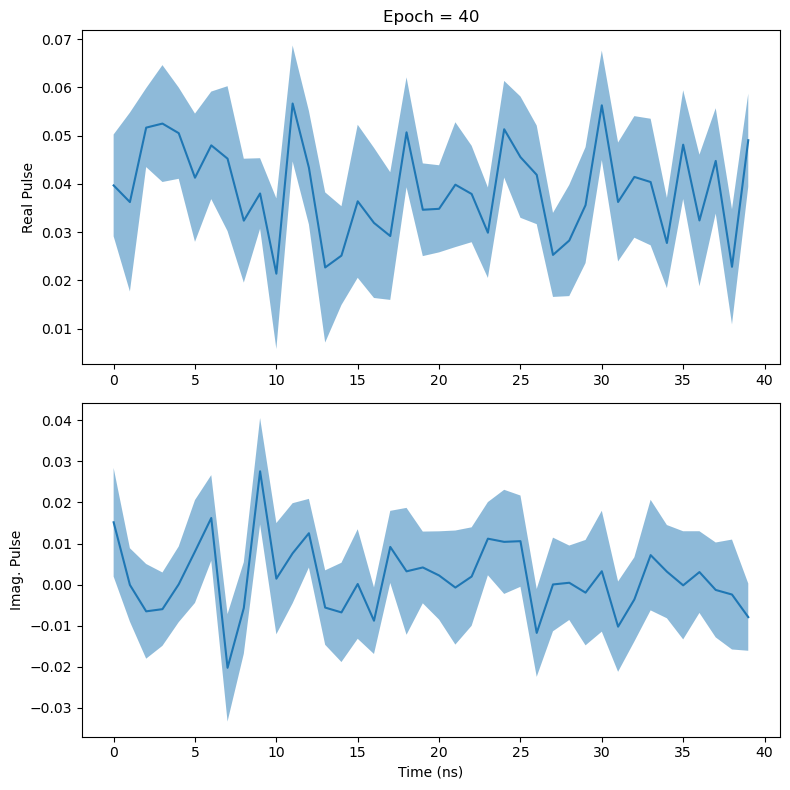

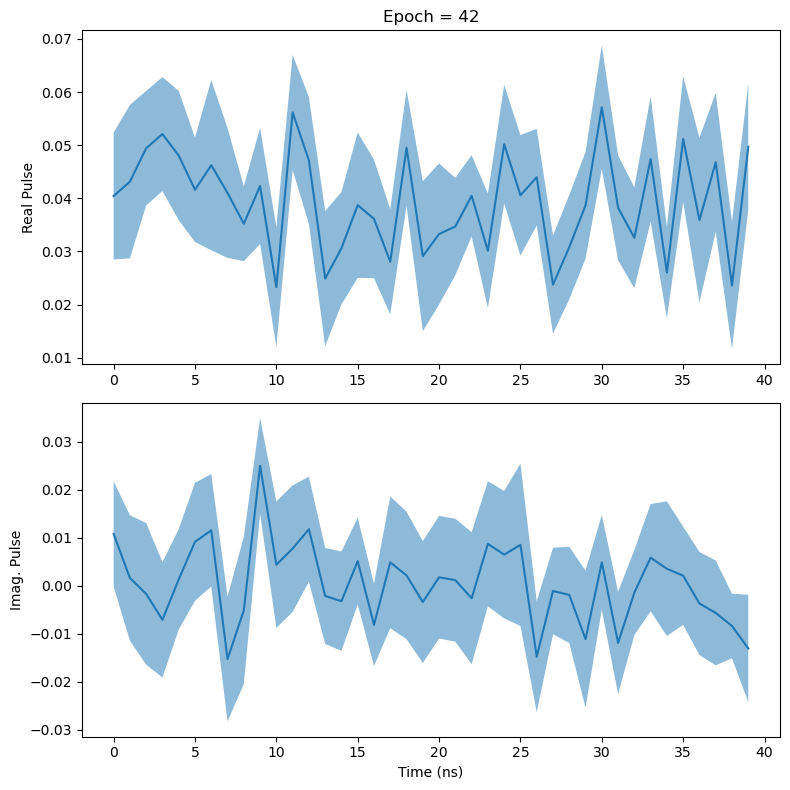

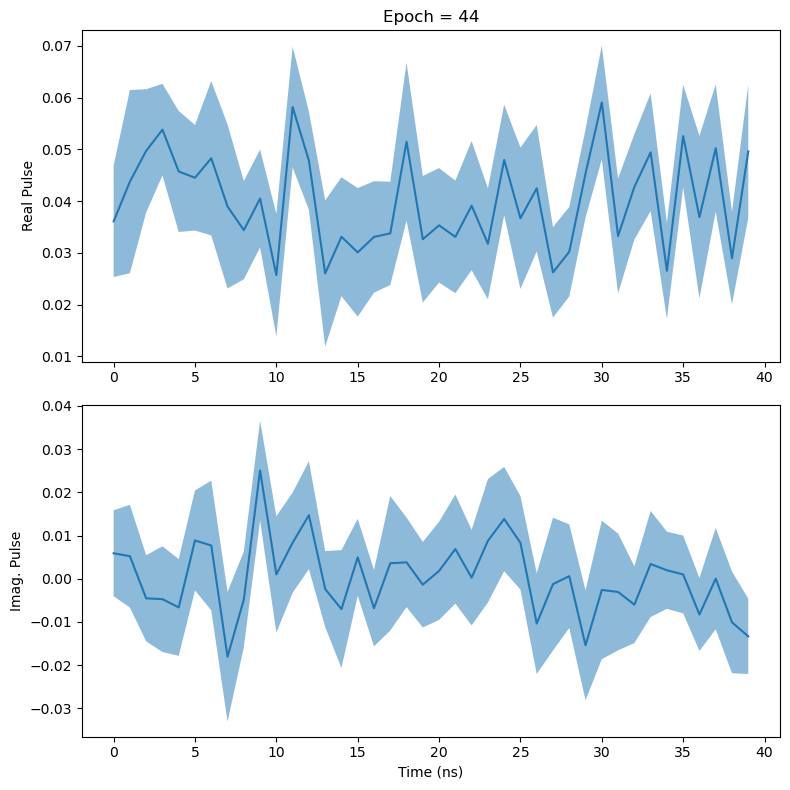

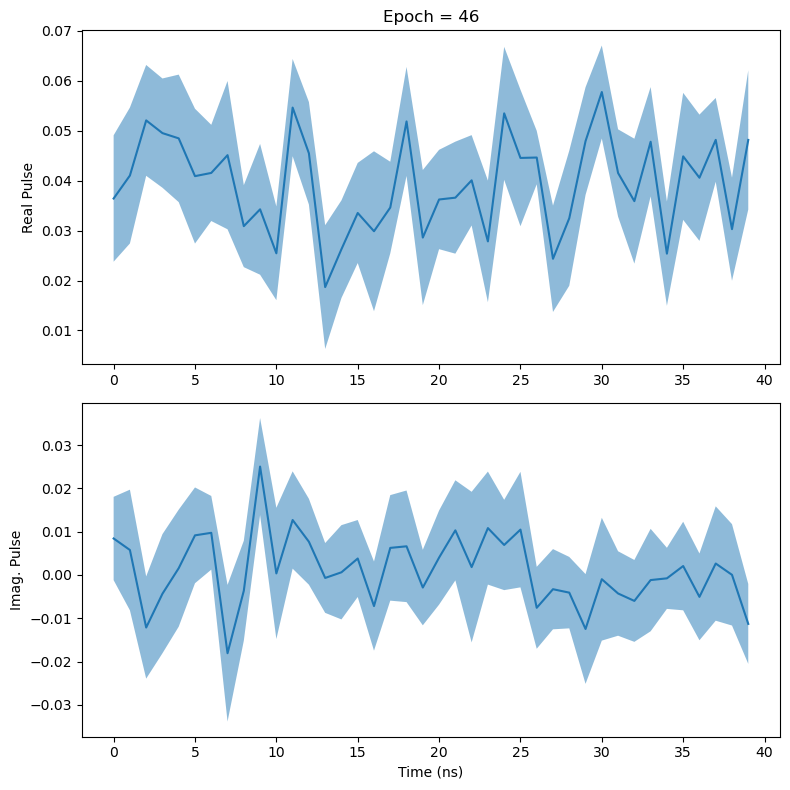

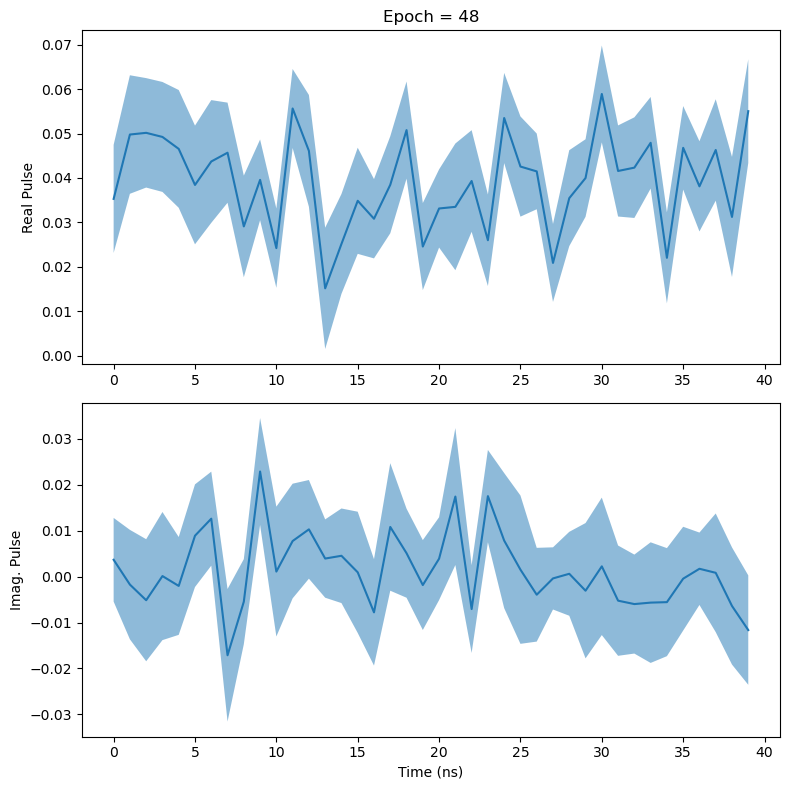

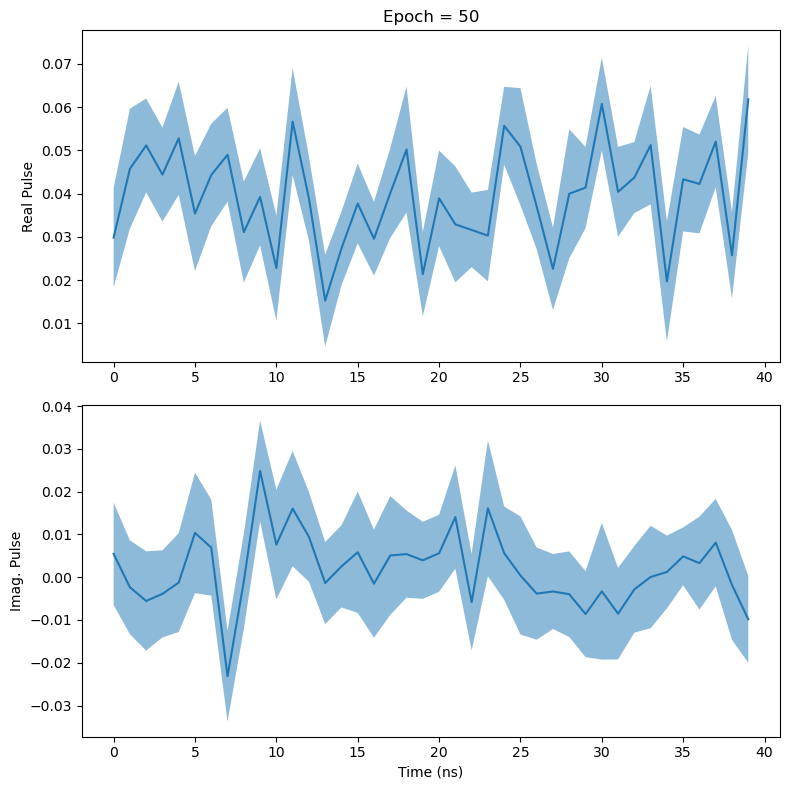

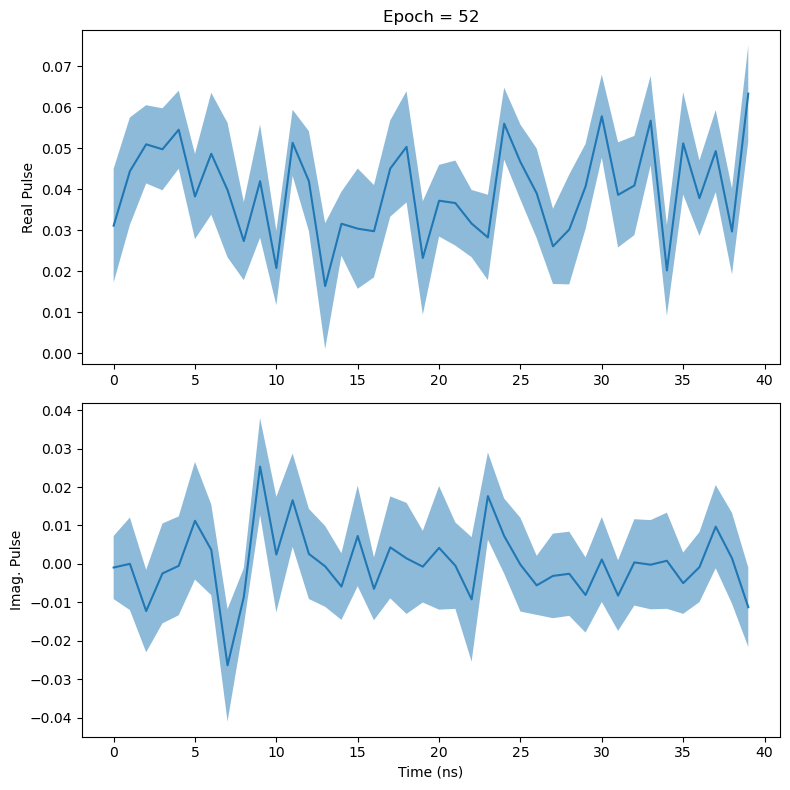

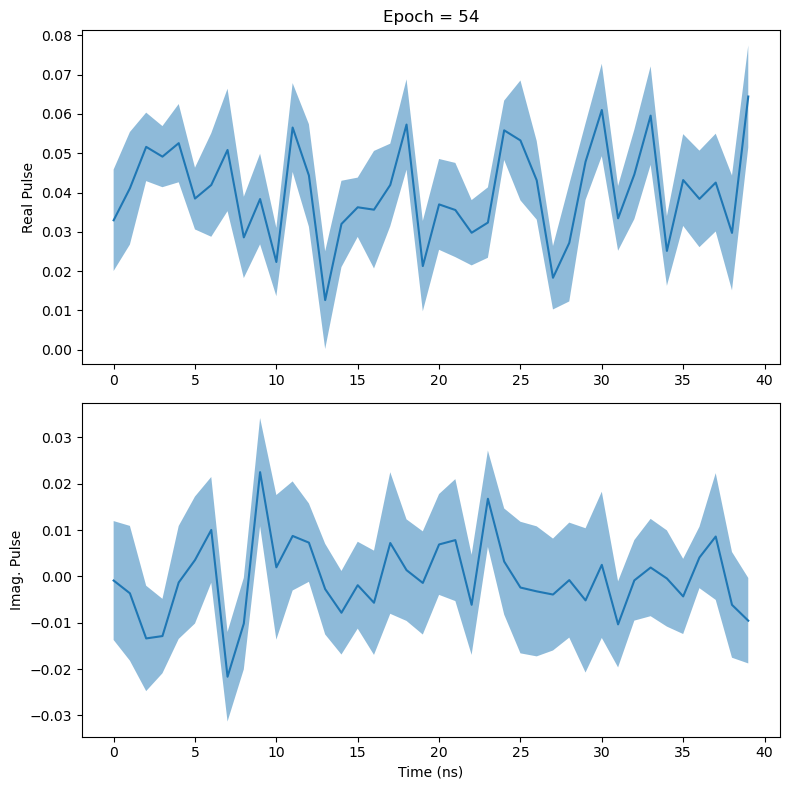

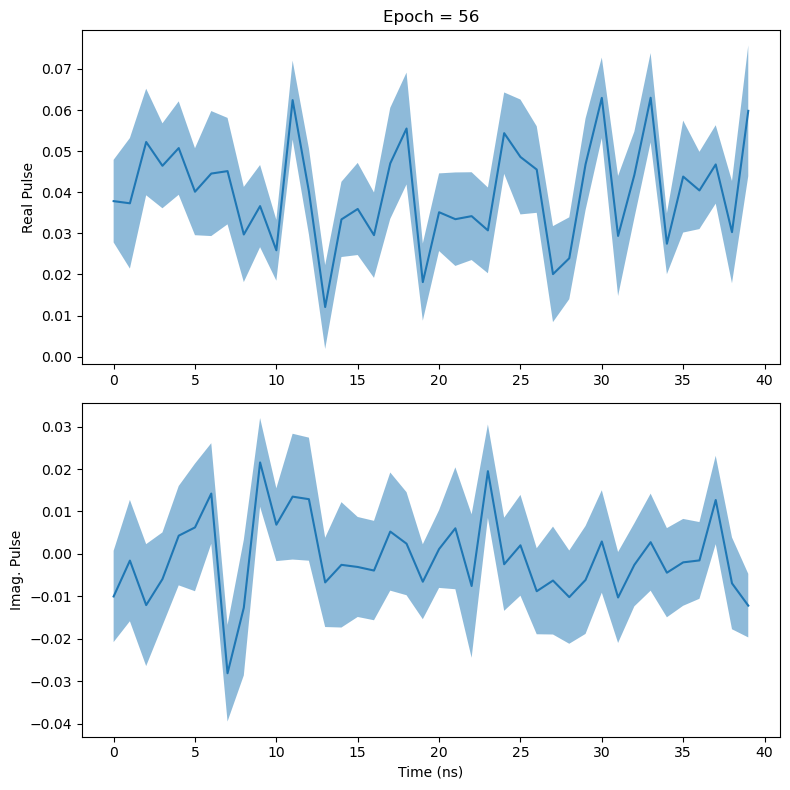

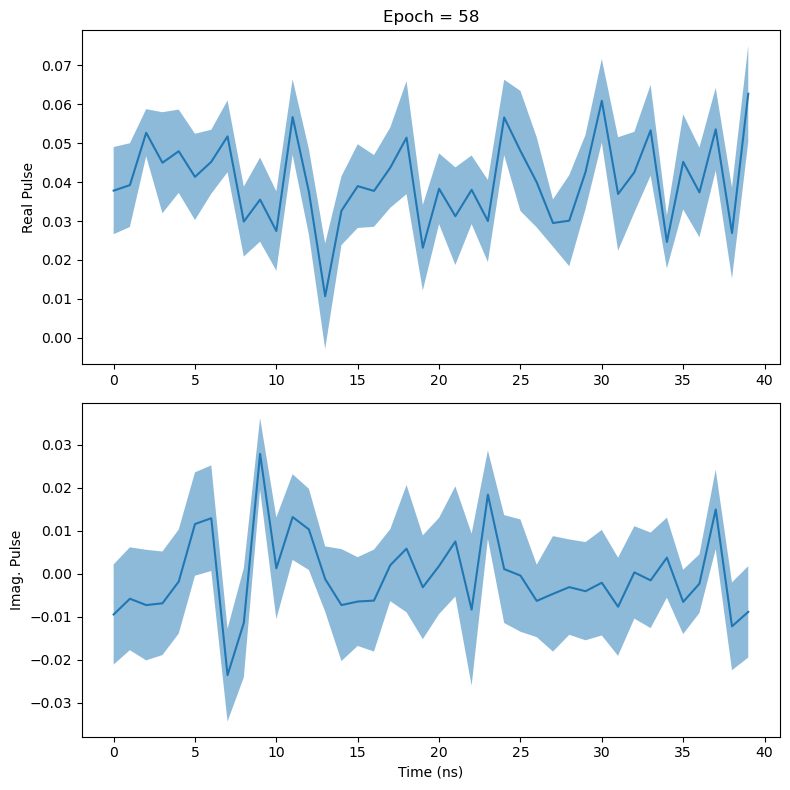

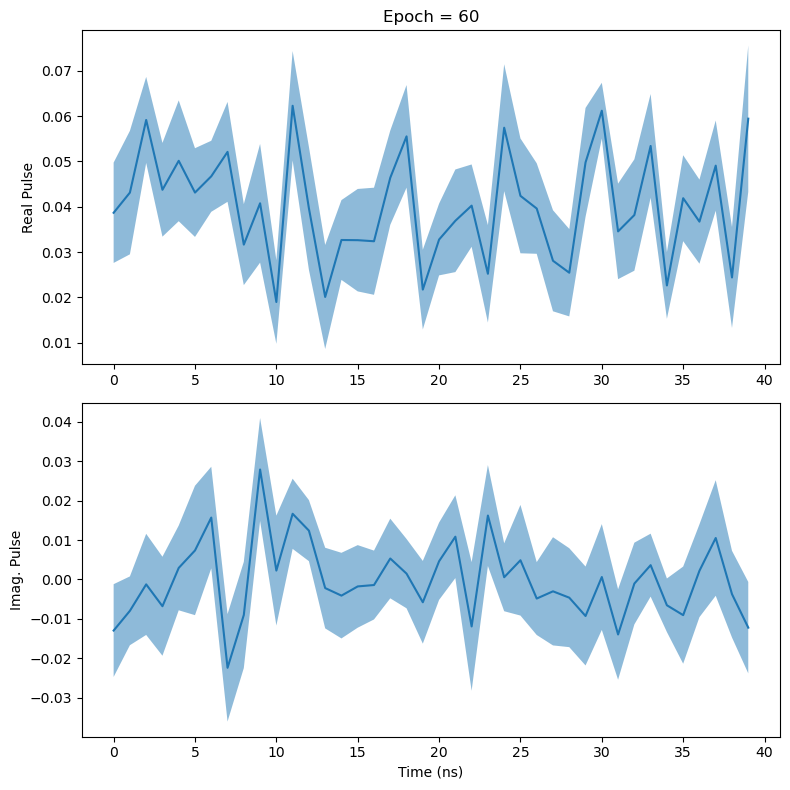

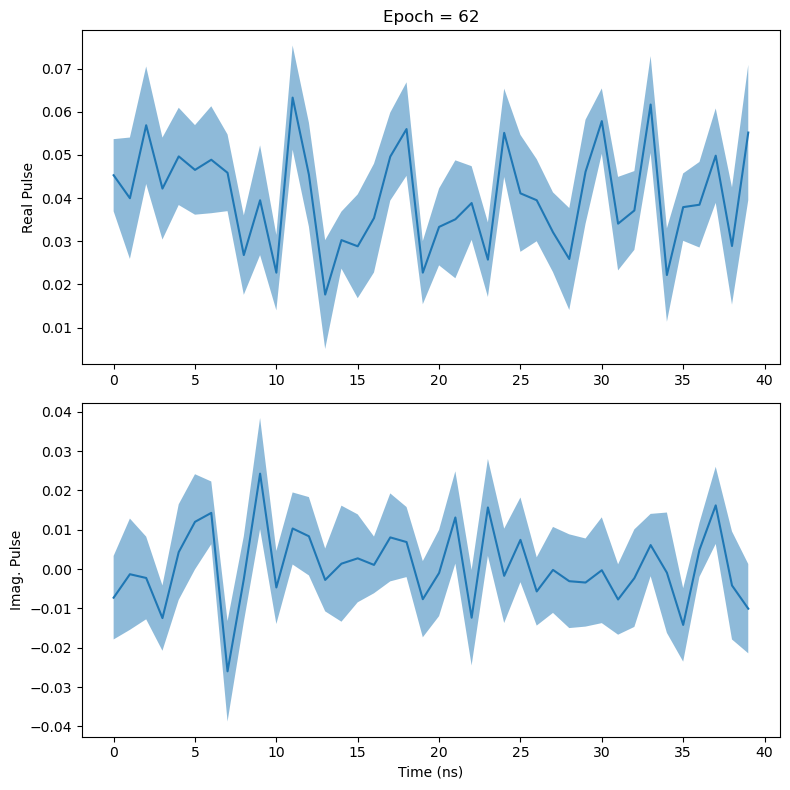

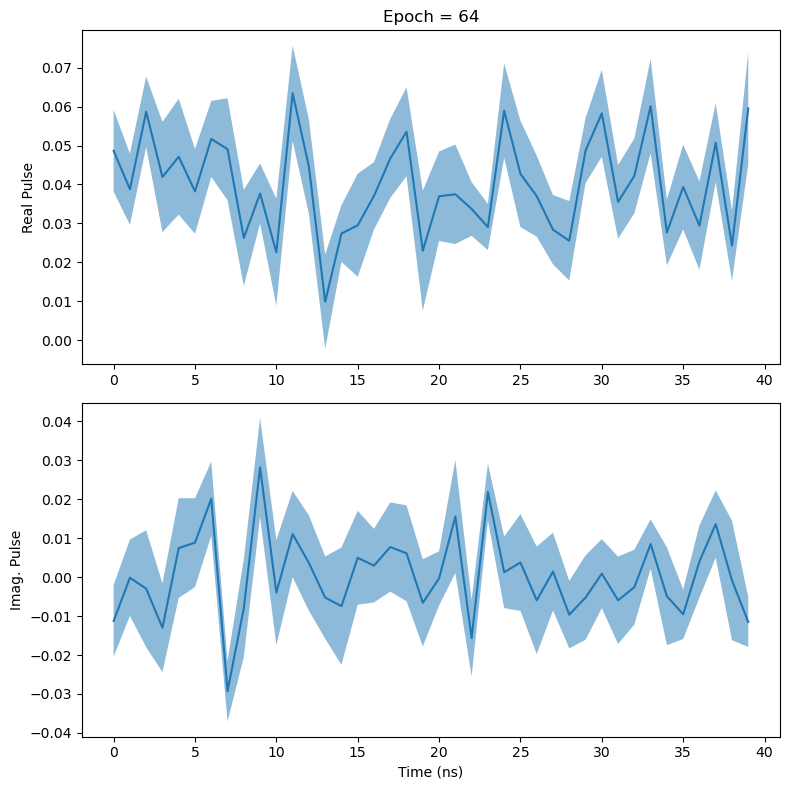

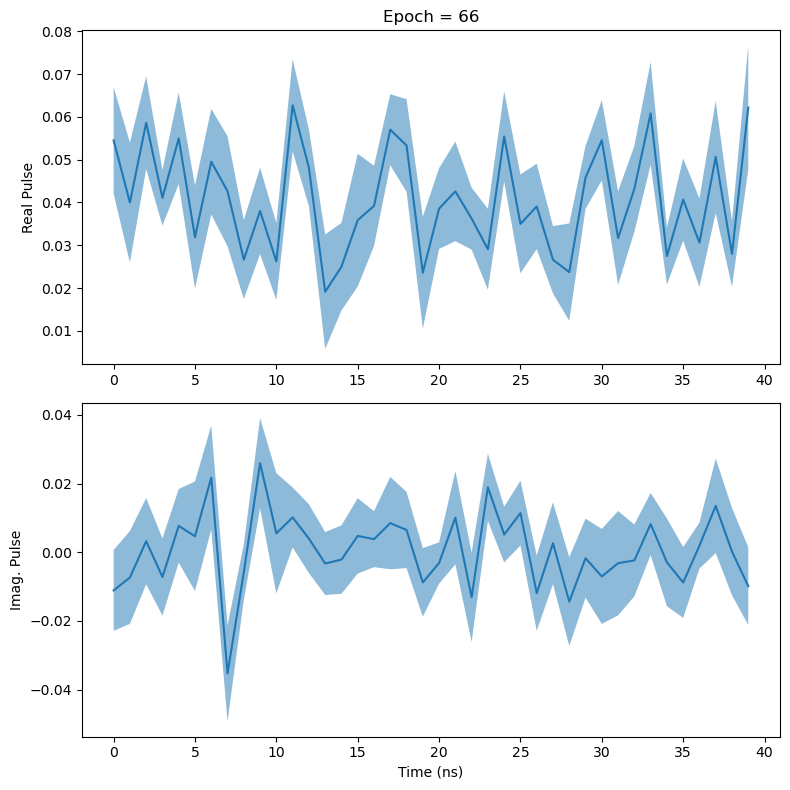

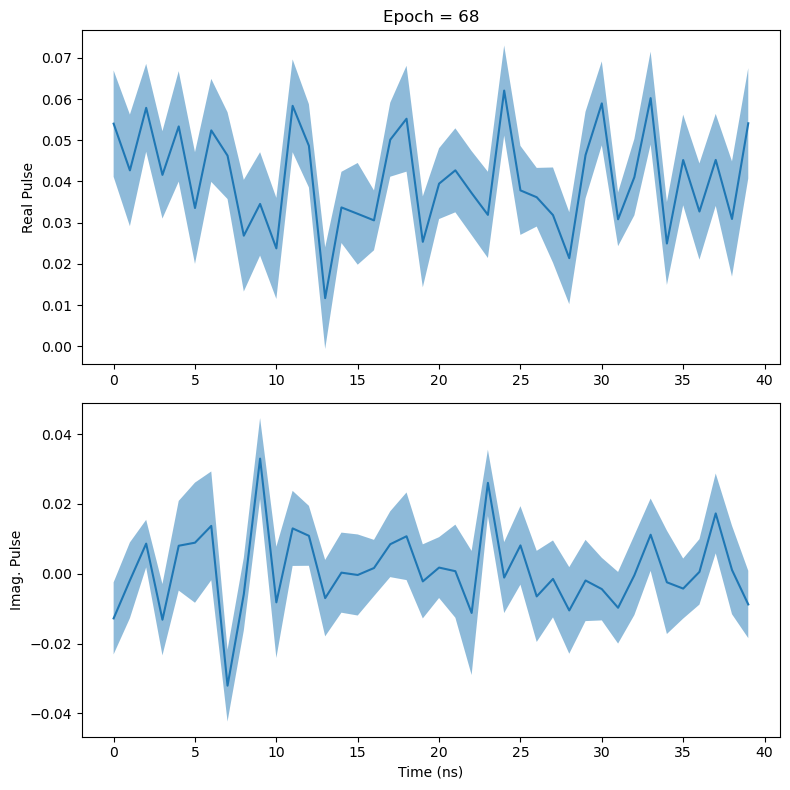

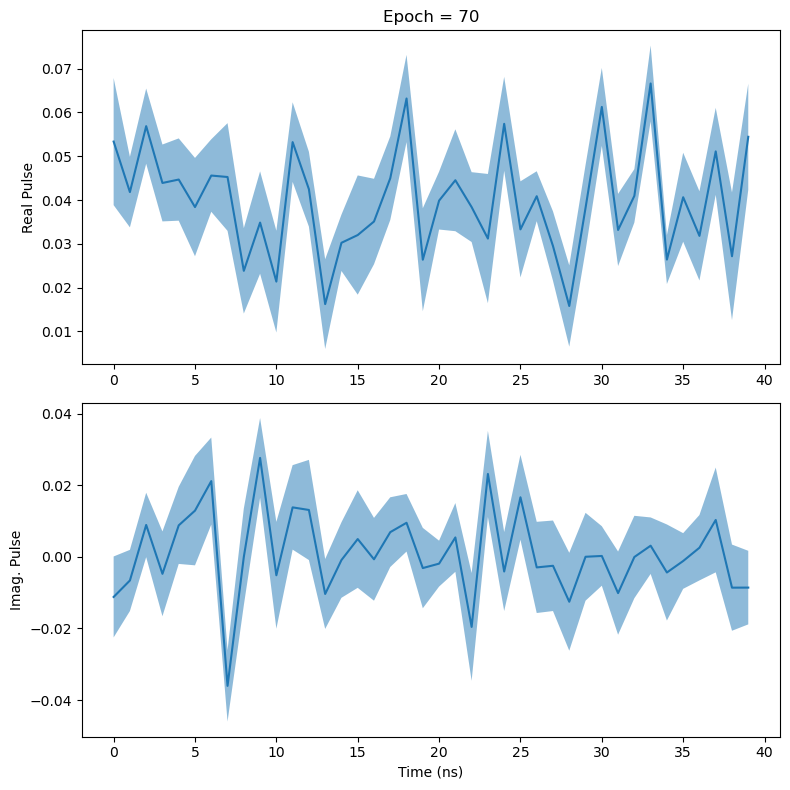

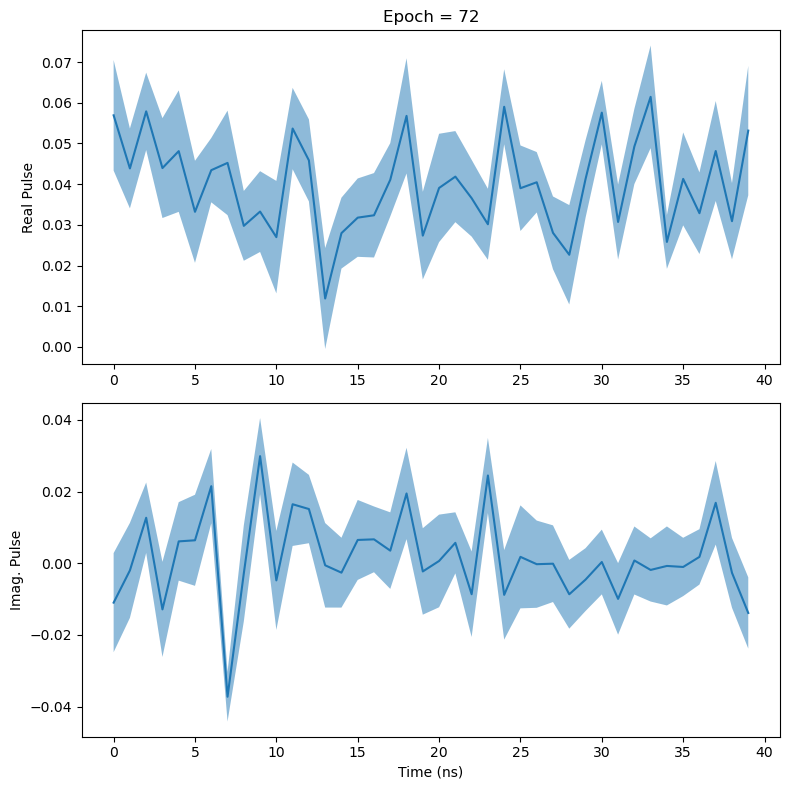

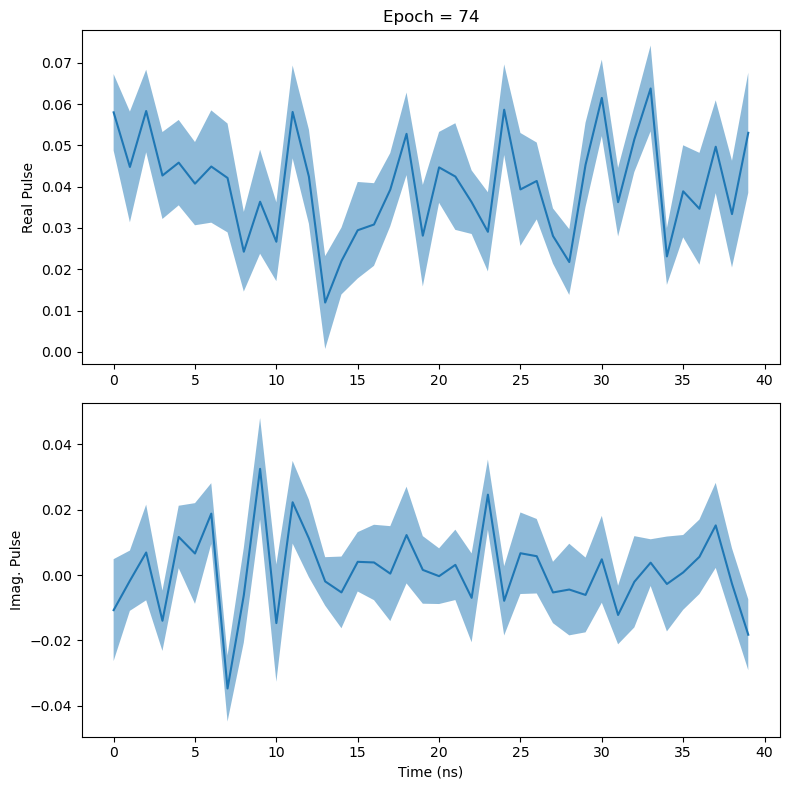

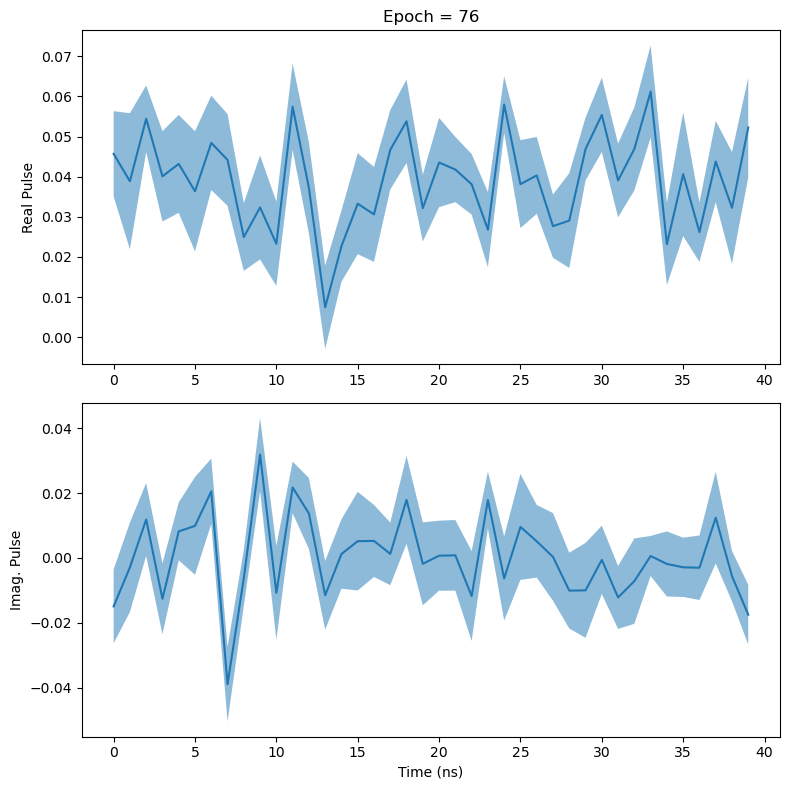

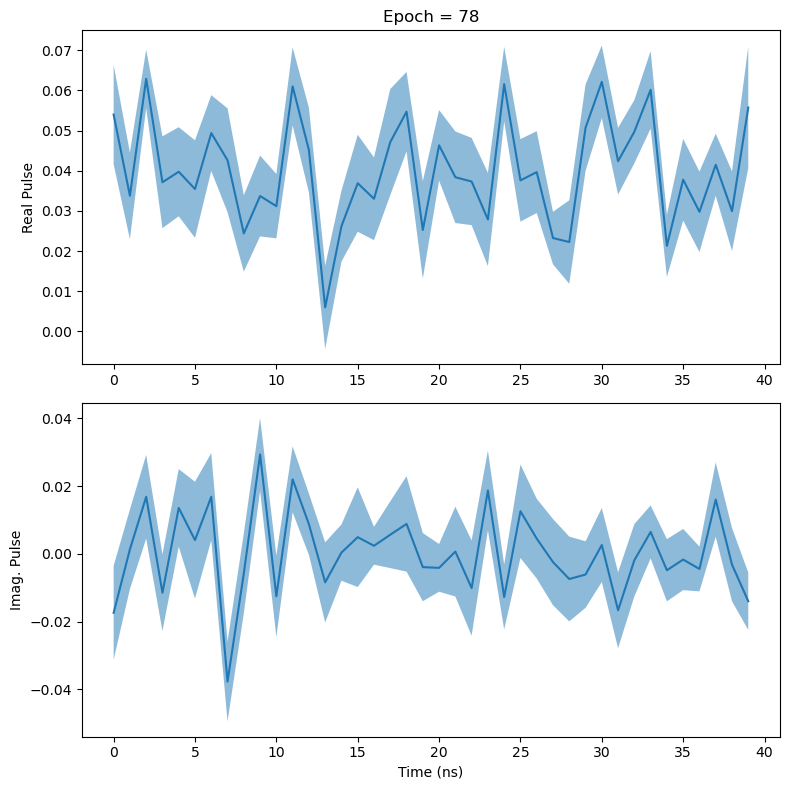

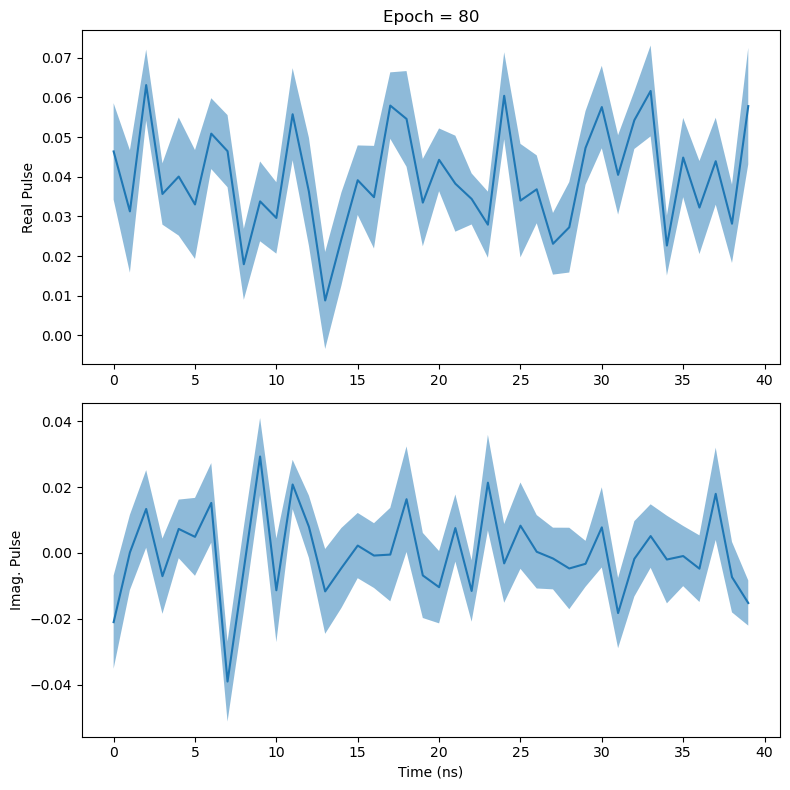

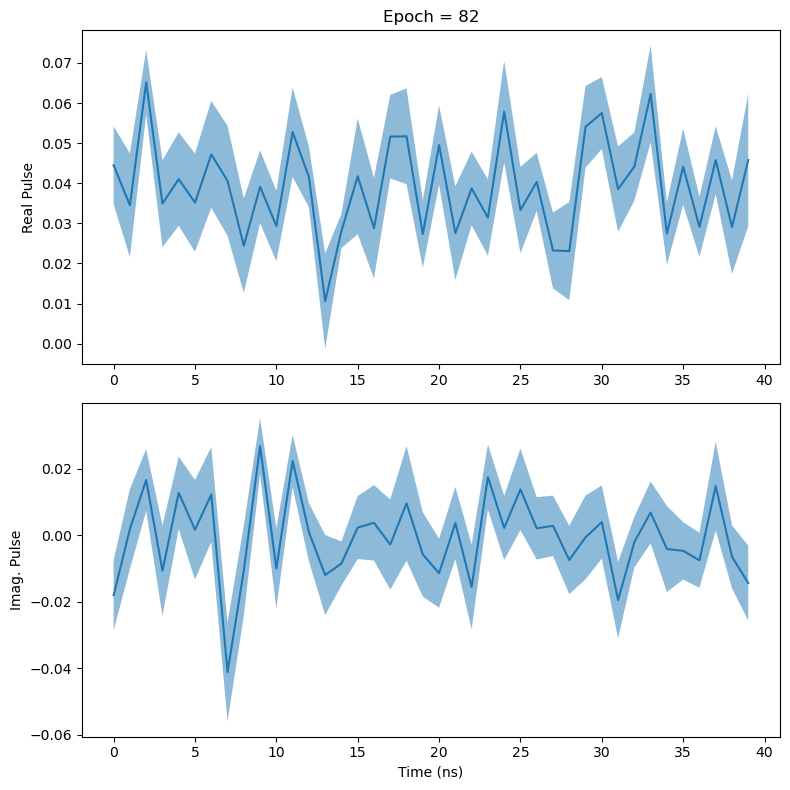

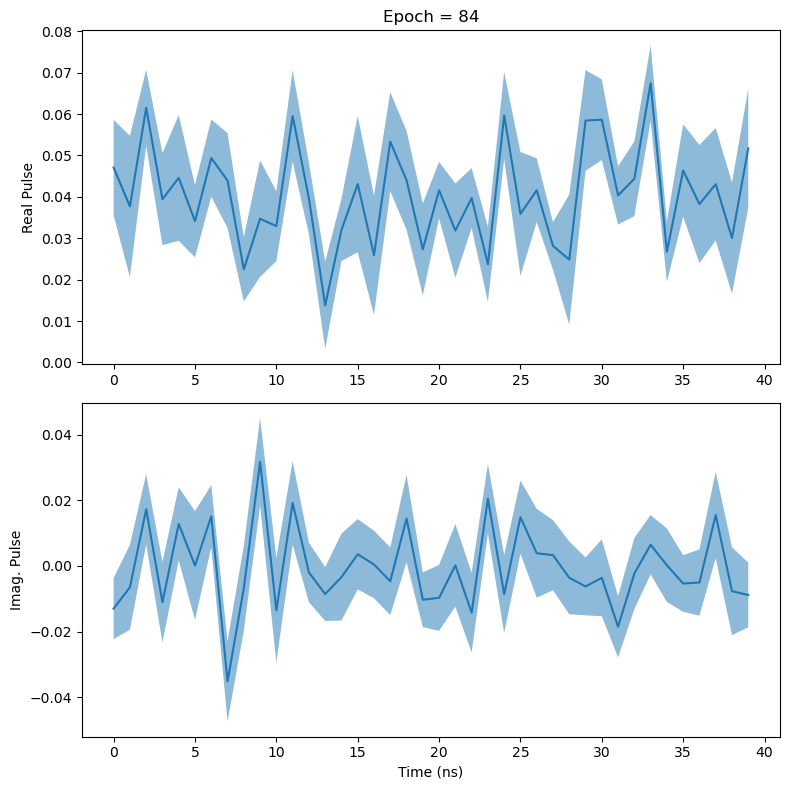

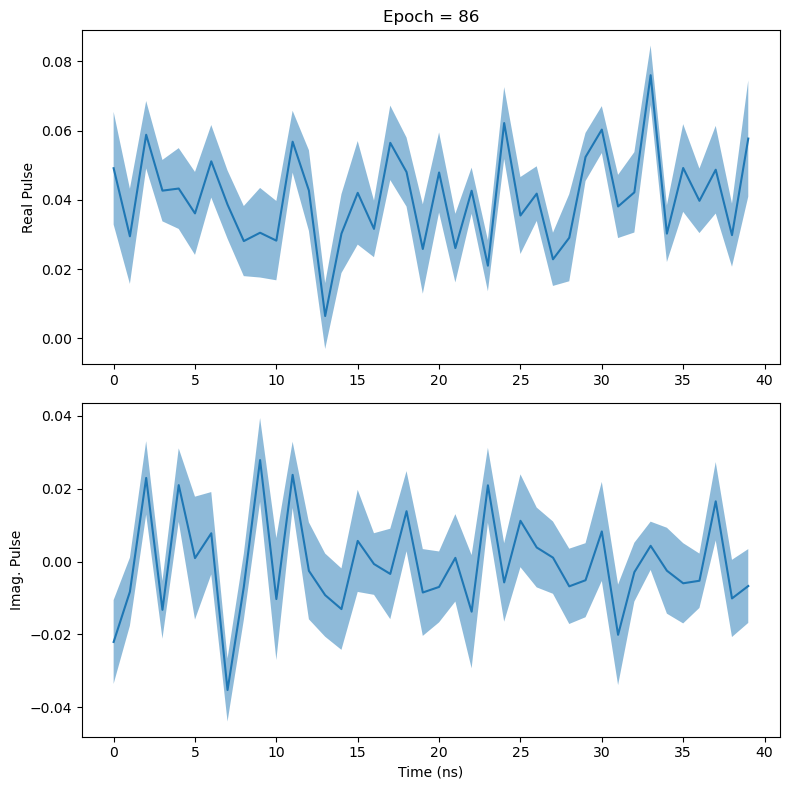

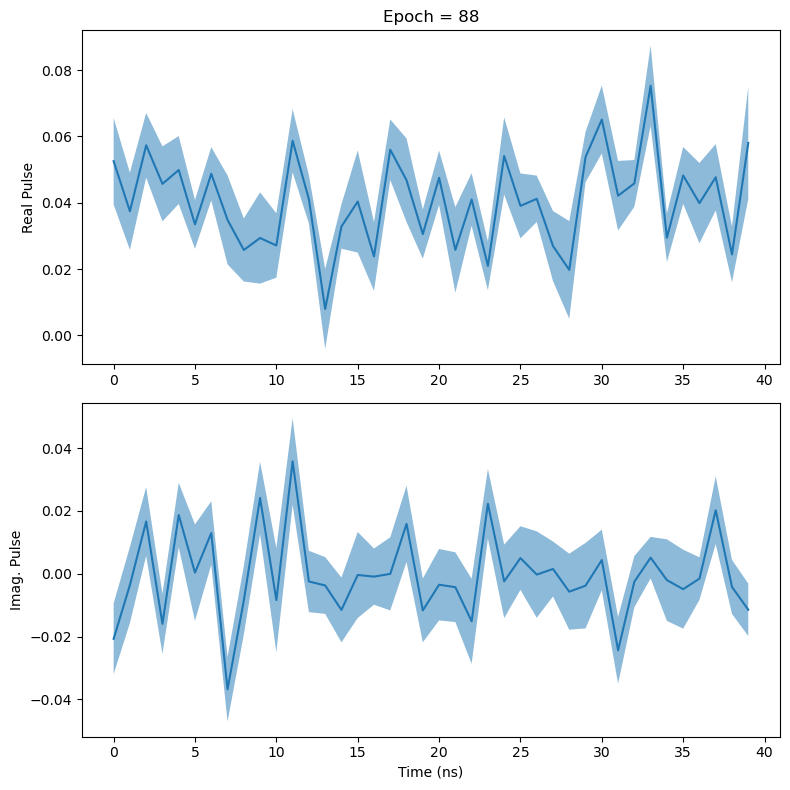

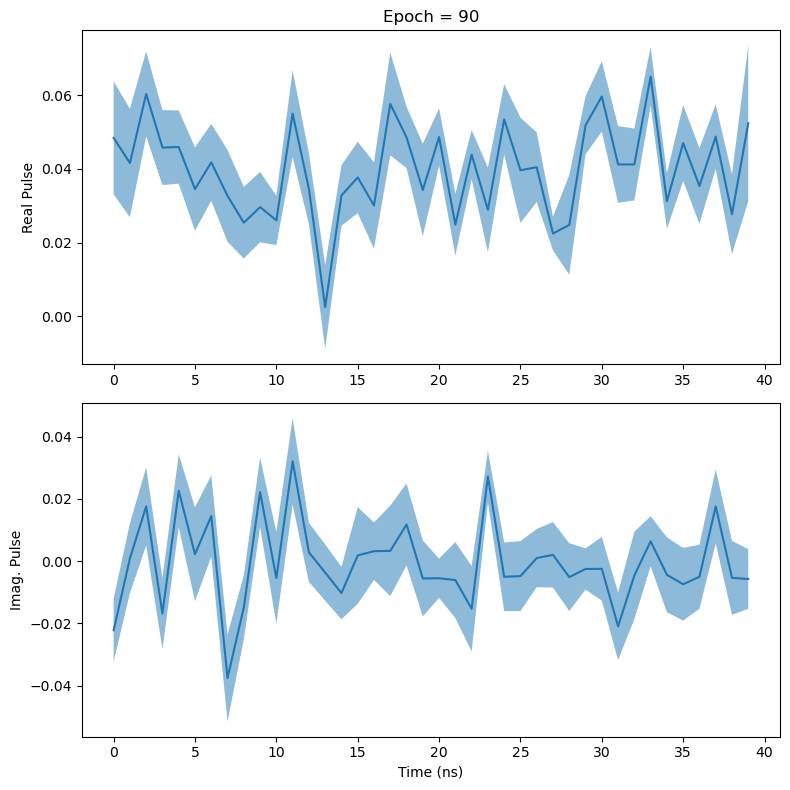

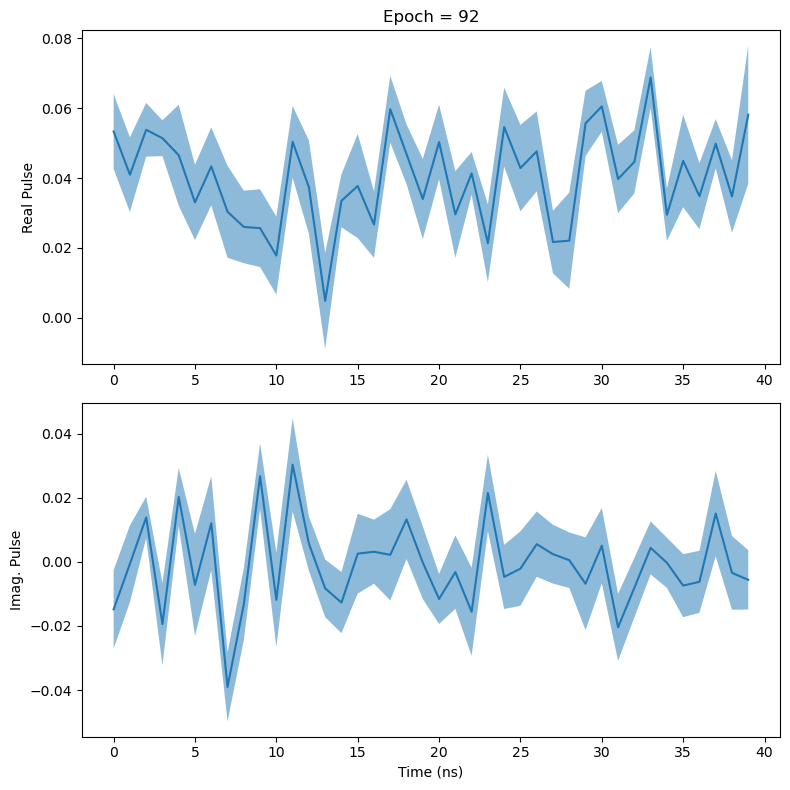

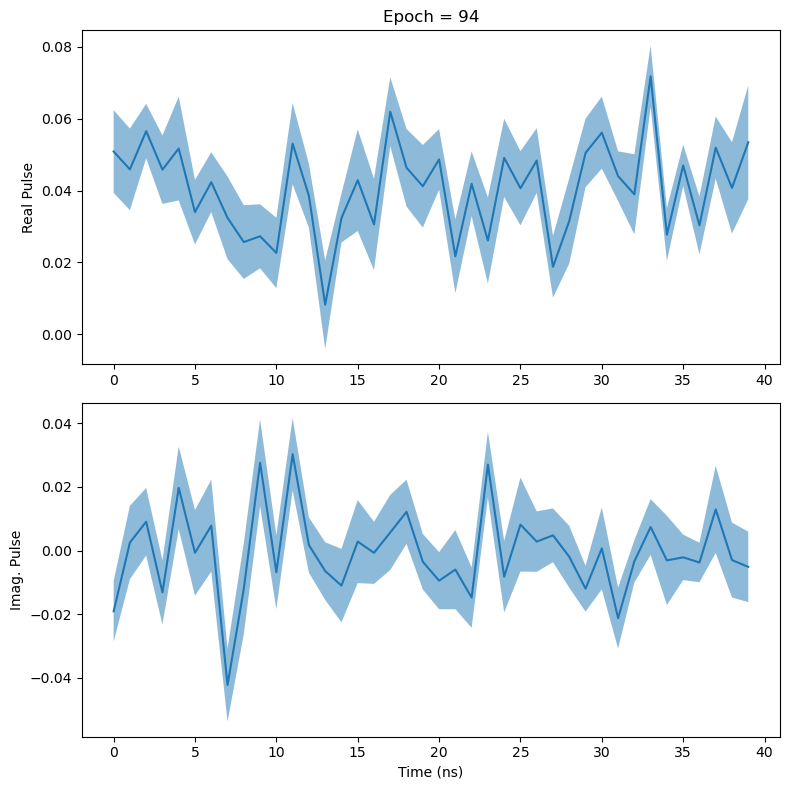

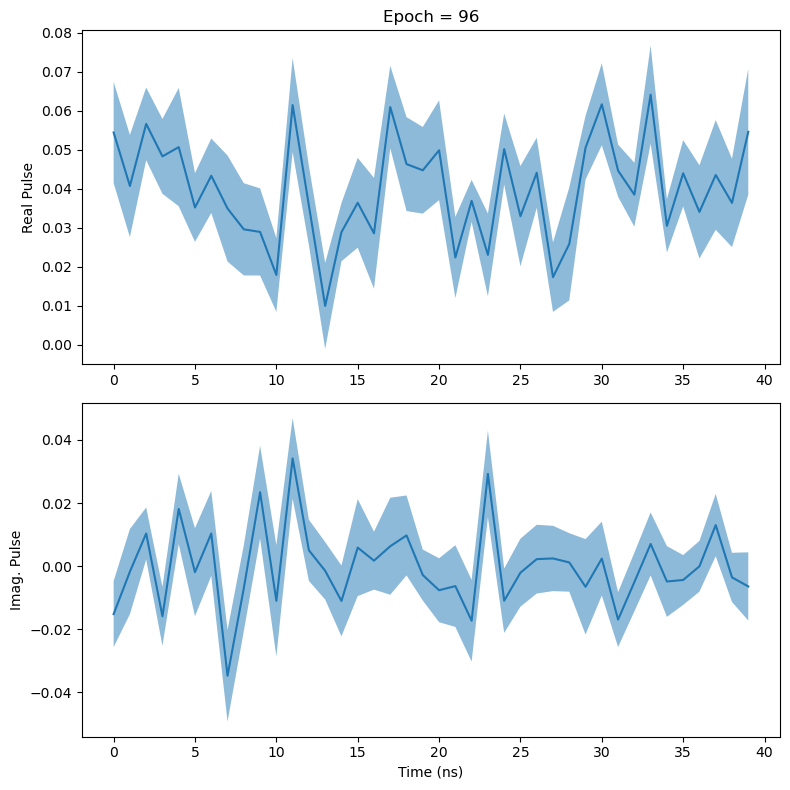

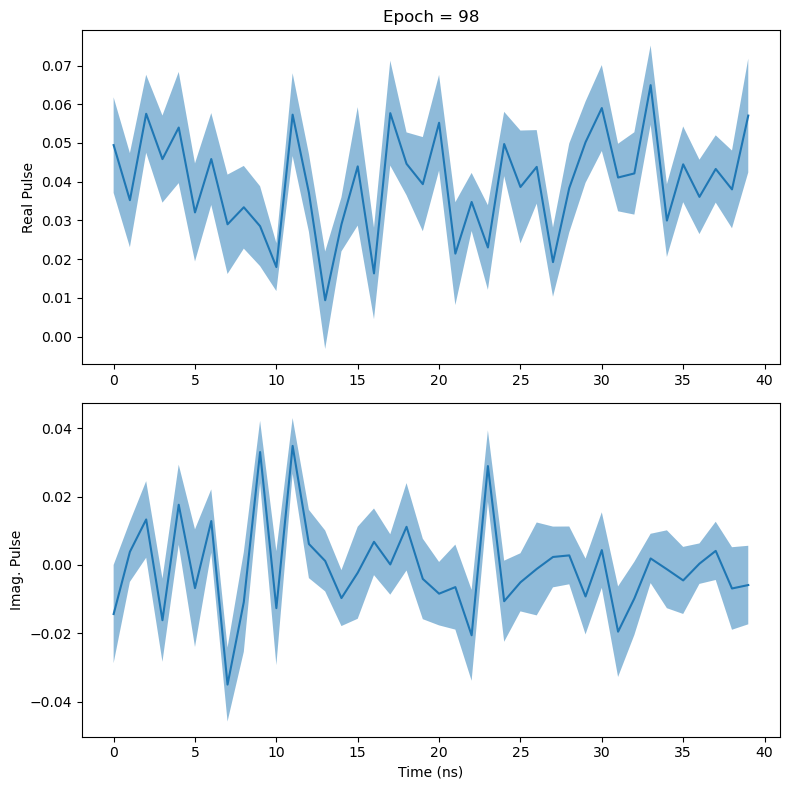

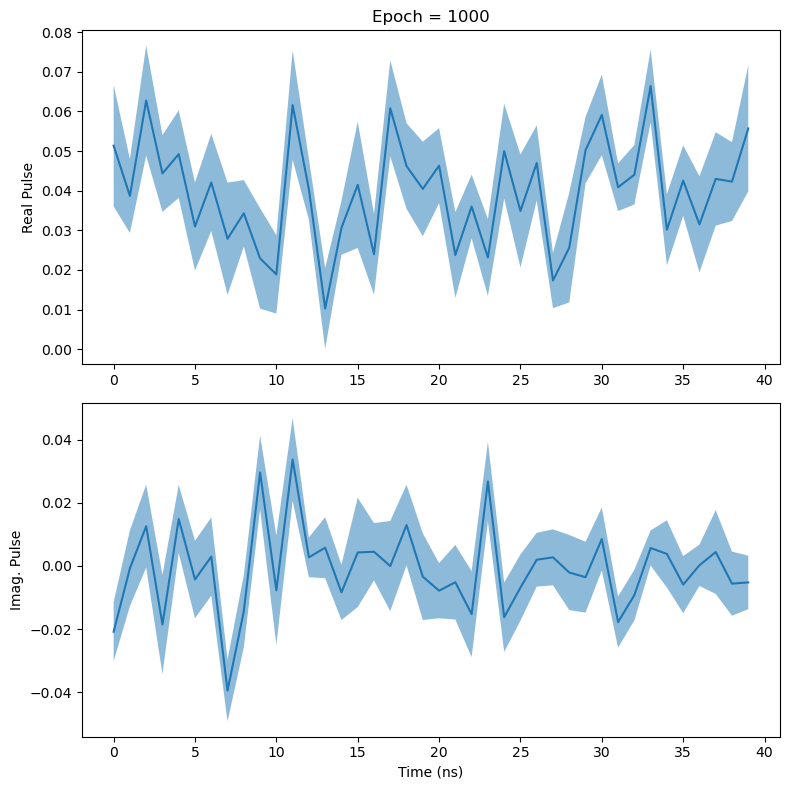

In [5]:

ts = np.arange(mean_real_pulses.shape[-1])
n_plots = 50
ind_factor = rl_params['num_epochs']//n_plots
for ii in range(n_plots):

    fig,axarr = plt.subplots(2,1,figsize=(8,8))

    axarr[0].plot(ts,mean_real_pulses[ind_factor*ii])
    axarr[0].fill_between(ts,
                        mean_real_pulses[ind_factor*ii]-stdev_real_pulses[ind_factor*ii],
                        mean_real_pulses[ind_factor*ii]+stdev_real_pulses[ind_factor*ii],
                        alpha=0.5)
    axarr[0].set_title('Epoch = '+str(ind_factor*ii))
    axarr[0].set_ylabel('Real Pulse')

    axarr[1].plot(ts,mean_imag_pulses[ind_factor*ii])
    axarr[1].fill_between(ts,
                        mean_imag_pulses[ind_factor*ii]-stdev_imag_pulses[ind_factor*ii],
                        mean_imag_pulses[ind_factor*ii]+stdev_imag_pulses[ind_factor*ii],
                        alpha=0.5)
    axarr[1].set_ylabel('Imag. Pulse')
    axarr[1].set_xlabel('Time (ns)')

    plt.tight_layout()
    plt.show()
# %%

fig,axarr = plt.subplots(2,1,figsize=(8,8))

axarr[0].plot(ts,mean_real_pulses[-1])
axarr[0].fill_between(ts,
                    mean_real_pulses[-1]-stdev_real_pulses[-1],
                    mean_real_pulses[-1]+stdev_real_pulses[-1],
                    alpha=0.5)
axarr[0].set_title('Epoch = '+str(100))
axarr[0].set_ylabel('Real Pulse')

axarr[1].plot(ts,mean_imag_pulses[-1])
axarr[1].fill_between(ts,
                    mean_imag_pulses[-1]-stdev_imag_pulses[-1],
                    mean_imag_pulses[-1]+stdev_imag_pulses[-1],
                    alpha=0.5)
axarr[1].set_ylabel('Imag. Pulse')
axarr[1].set_xlabel('Time (ns)')

plt.tight_layout()
plt.show()
